<a href="https://colab.research.google.com/github/Alice188912/Alice188912/blob/main/04_dhsi_word_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[link to lecture](https://tubedu.org/w/ac76ef73-4a3c-46a4-8620-ef806a7c2104)




[Garg, N., Schiebinger, L., Jurafsky, D., and Zou, J. (2018) “Word embeddings quantify 100 years of gender and ethnic stereotypes” PNAS 115:16](https://via.hypothes.is/https://dhsi2022.jonreeve.com/static/readings/garg.pdf)

In [1]:
import spacy

In [2]:
spacy.cli.download('en_core_web_lg')

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [3]:
nlp = spacy.load('en_core_web_lg')

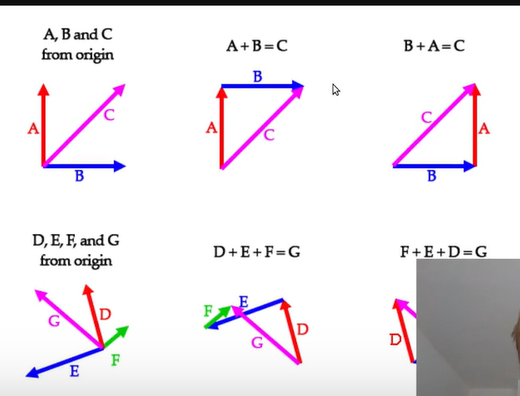

In [4]:
def mostSimilar(vec, topn=10):
    """
    Find the vectors that are the most similar to our vector. 
    We'll use the undocumented function most_similar() from: 
    https://github.com/explosion/spaCy/blob/master/spacy/vectors.pyx#L249
    But it requires we give it an array of vectors, rather than just a vector
    So we'll reshape it first. See https://github.com/explosion/spaCy/issues/276
    """
    reshaped = vec.reshape(1, vec.shape[0]) 
    similar = nlp.vocab.vectors.most_similar(reshaped, n=topn)
    words = [nlp.vocab.strings[w] for w in similar[0][0]]
    distances = similar[2][0]
    return list(zip(words, distances))

In [16]:
africanSwallow = nlp("Afican swallow")
europeanSwallow = nlp("European swallow")

In [17]:
africanSwallow.similarity(europeanSwallow)

0.8195242879814014

In [18]:
difference = africanSwallow.vector - europeanSwallow.vector
# subtract

In [19]:
mostSimilar(difference)

[('a/k/a', 0.2505),
 ('reír', 0.2147),
 ('49B', 0.2145),
 ('49b', 0.2145),
 ('every.single.day', 0.2094),
 ('EDITORIALIZES', 0.2087),
 ('Editorializes', 0.2087),
 ('editorializes', 0.2087),
 ('Owyn', 0.2075),
 ('owyn', 0.2075)]

In [8]:
len(nlp.vocab)

1340242

In [10]:
mostSimilar(europeanSwallow.vector)

[('swallow', 0.8195),
 ('SWALLOW', 0.8195),
 ('Swallow', 0.8195),
 ('European', 0.7986),
 ('EUropean', 0.7986),
 ('EUROPEAN', 0.7986),
 ('european', 0.7986),
 ('Swallowing', 0.6675),
 ('swallowing', 0.6675),
 ('SWALLOWING', 0.6675)]

In [11]:
mostSimilar(nlp('symphony').vector)

[('SYMPHONY', 1.0),
 ('symphony', 1.0),
 ('Symphony', 1.0),
 ('Orchestra', 0.7981),
 ('orchestra', 0.7981),
 ('ORCHESTRA', 0.7981),
 ('SYMPHONIES', 0.741),
 ('Symphonies', 0.741),
 ('symphonies', 0.741),
 ('Symphonic', 0.7079)]

[('a/k/a', 0.2505),
 ('reír', 0.2147),
 ('49B', 0.2145),
 ('49b', 0.2145),
 ('every.single.day', 0.2094),
 ('EDITORIALIZES', 0.2087),
 ('Editorializes', 0.2087),
 ('editorializes', 0.2087),
 ('Owyn', 0.2075),
 ('owyn', 0.2075)]

In [20]:
mostSimilar(nlp('peanut butter').vector-nlp('peanut').vector)

[('Butter', 0.3934),
 ('butter', 0.3934),
 ('BUTTER', 0.3934),
 ('saucepan', 0.358),
 ('Saucepan', 0.358),
 ('SAUCEPAN', 0.358),
 ('yolks', 0.3508),
 ('YOLKS', 0.3508),
 ('Yolks', 0.3508),
 ('BROWNED', 0.3502)]

In [24]:
mostSimilar(nlp('king').vector-nlp('man').vector+nlp('woman').vector)
# this is better in gender; the bias of the original dataset


[('King', 0.8024),
 ('KIng', 0.8024),
 ('king', 0.8024),
 ('KING', 0.8024),
 ('queen', 0.7881),
 ('QUEEN', 0.7881),
 ('Queen', 0.7881),
 ('PRINCE', 0.6401),
 ('prince', 0.6401),
 ('Prince', 0.6401)]

In [25]:
labels = ["king", "queen", "man", "woman"]
vectors = [nlp(word).vector for word in labels]

In [28]:
from sklearn.decomposition import PCA
import pandas as pd

In [31]:
pca = PCA(n_components = 3)
pcaOut = pca.fit_transform(pd.DataFrame(vectors))

In [33]:
pcaOut
# four words, three dimensions

array([[-3.7271967, -2.1668935, -1.142998 ],
       [-3.2678556,  2.4820273,  1.1098561],
       [ 3.2120848, -2.1486082,  1.3290064],
       [ 3.7829685,  1.8334746, -1.295864 ]], dtype=float32)

In [34]:
pd.DataFrame(pcaOut)

,0,1,2
0,-3.727197,-2.166893,-1.142998
1,-3.267856,2.482027,1.109856
2,3.212085,-2.148608,1.329006
3,3.782969,1.833475,-1.295864


In [35]:
import plotly.express as px

In [36]:
# !pip3 install plotly


In [39]:
px.scatter_3d(pd.DataFrame(pcaOut), x=0, y=1, z=2, text = labels)

In [40]:
labels = ["Japan", "Tokyo", "France", "Paris"]
vectors = [nlp(word).vector for word in labels]
pca = PCA(n_components = 3)
pcaOut = pca.fit_transform(pd.DataFrame(vectors))
px.scatter_3d(pd.DataFrame(pcaOut), x=0, y=1, z=2, text = labels)

In [41]:
japan, tokyo, france, paris = [nlp(doc).vector for doc in labels]

In [44]:
mostSimilar(tokyo - japan + france)
# ignore the vectors that we already have

[('France', 0.8347),
 ('FRANCE', 0.8347),
 ('france', 0.8347),
 ('Paris', 0.7704),
 ('paris', 0.7704),
 ('PARIS', 0.7704),
 ('toulouse', 0.6382),
 ('Toulouse', 0.6382),
 ('TOULOUSE', 0.6382),
 ('marseille', 0.6371)]

In [45]:
# remove from the list the vectors we already have
def mostSimilar2(vec, alreadyHave=[]):
  # a better mostSimilar function: give the vector and vectors already have
  outputList = []
  similar = mostSimilar(vec)
  for word,similarity in similar:
    if word.lower() in alreadyHave:
      continue
    else:
      outputList.append((word,similarity))
  return outputList


In [47]:
mostSimilar2(tokyo - japan + france, alreadyHave = [w.lower() for w in labels])

[('toulouse', 0.6382),
 ('Toulouse', 0.6382),
 ('TOULOUSE', 0.6382),
 ('marseille', 0.6371)]

In [48]:
def bestGuest(vec, alreadyHave=[]):
  # a better mostSimilar function: give the vector and vectors already have
  outputList = []
  similar = mostSimilar(vec)
  for word,similarity in similar:
    if word.lower() in alreadyHave:
      continue
    else:
      outputList.append((word,similarity))
  return outputList[0][0]
  # return the first item in the first list

In [49]:
bestGuest(tokyo - japan + france, alreadyHave = [w.lower() for w in labels])

'toulouse'

In [57]:
labels = ['CEO', 'company','university']
CEO, company, university = [nlp(w).vector for w in labels]

In [58]:
bestGuest(CEO-company+university, alreadyHave = [w.lower() for w in labels])

'harvard'